# DS 3000 - Practicum 1

**Student Names:** Wen Zheng, Brian Gerber, Dhruv Laungani, Matthew Tong

**Date:**  Feb. 8, 2025

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Question 1 — The DS Problem**

1. In your own words, formulate the Data Science problem that you were given.

The Data Science problem that we were given is analyzing flight delays for airlines departing from Arizona (AZ), Nevada (NV), and California (CA) in 2019. We want to analyze air traffic patterns and see which airlines are more likely to have delays. By looking at how often and how long flights are delayed, we hope to identify key factors that influence delays, which will provide information into airport congestion and potential solutions to the congestion.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 2019_ONTIME_REPORTING_FSW.csv to 2019_ONTIME_REPORTING_FSW.csv



**Question 2 — Prepare the Data**

1.   Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types (if needed).
2.   Analyze the data to determine what preprocessing steps are needed. Perform the required data preparation steps. At a minimum, ensure that you handle both missing and invalid values. Justify the approach that is taken to prepare the data for analysis.
3.  At a high level, provide an overview of the dataset; prepare summary statistics and at least three visualizations to support your explanation. Note: the explanation and visualizations should be relevant to the DS Problem in question


In [ ]:
# Reading File
df = pd.read_csv('2019_ONTIME_REPORTING_FSW.csv')

# Values with NA
missing_values = df.isnull().sum()

# Analyzing the data
print(df.head())
print(df.dtypes)
print(missing_values)
print('The dimension of the data is (row, columns):', df.shape)
print(f"Total amount of negative values in DISTANCE column is: {(df['DISTANCE'] < 0).sum()}")
print(f"Total amount of negative values in ELAPSED_TIME column is: {(df['ELAPSED_TIME'] < 0).sum()}")
print(f"Total amount of negative values in ARR_DELAY column is: {(df['ARR_DELAY'] < 0).sum()}")
print(f"Total amount of negative values in DEP_DELAY column is: {(df['DEP_DELAY'] < 0).sum()}")

   FL_DATE CARRIER_CODE TAIL_NUM  FL_NUM ORIGIN ORIGIN_ST DEST DEST_ST  \
0  10/1/19           AA   N916NN    2311    TUS        AZ  ORD      IL   
1  10/1/19           AA   N733UW    2315    PHX        AZ  DEN      CO   
2  10/1/19           AA   N140AN    2318    DFW        TX  LAX      CA   
3  10/1/19           AA   N925AN    2325    SNA        CA  DFW      TX   
4  10/1/19           AA   N143AN    2328    ATL        GA  LAX      CA   

   DEP_TIME  DEP_DELAY  ARR_TIME  ARR_DELAY  ELAPSED_TIME  DISTANCE  
0     828.0        0.0    1353.0        0.0         205.0      1437  
1    1907.0        0.0    2159.0        0.0         112.0       602  
2    1904.0      104.0    2016.0      101.0         192.0      1235  
3    1729.0        4.0    2215.0        3.0         166.0      1205  
4     656.0        0.0     841.0        0.0         285.0      1947  
FL_DATE          object
CARRIER_CODE     object
TAIL_NUM         object
FL_NUM            int64
ORIGIN           object
ORIGIN_ST      

**Overview of Data:** The dataset consists of 1,048,575 flights from Arizona (AZ), Nevada (NV), and California (CA) in 2019 with 14 header columns. \

Based on the initial examination of the data, we saw there is no invalid entries (aka. no negative values in the DISTANCE, ELAPSED_TIME, ARR_DELAY, DEP_DELAY columns). But we do see there missing values in the TAIL_NUM, DEP_TIME, DEP_DELAY, ARR_TIME, ARR_DELAY, and ELAPSED_TIME columns. ARR_DELAY and ELAPSED_TIME has the highest number of missing values with 18359. We decided to drop rows with missing values because the number of row with missing value represents about 1.75% of the total data we have (18359/1048575). Therefore, dropping them does not significantly reduce the sample size. Additionally, we decided not to fill missing values with 0 because it could misrepresent actual delays, as a missing delay does not necessarily mean "no delay."

In [ ]:
# Removing rows with missing values
df_cleaned = df.dropna(subset=['DEP_TIME', 'DEP_DELAY', 'ARR_TIME', 'ARR_DELAY', 'ELAPSED_TIME'])

# Converting variables to suitable data types
# Converting FL_DATE to datetime
df_cleaned['FL_DATE'] = pd.to_datetime(df_cleaned['FL_DATE'])

# Converting Variables to Int
df_cleaned['ELAPSED_TIME'] = df_cleaned['ELAPSED_TIME'].astype(int)
df_cleaned['ARR_DELAY'] = df_cleaned['ARR_DELAY'].astype(int)
df_cleaned['ARR_TIME'] = df_cleaned['ARR_TIME'].astype(int)
df_cleaned['DEP_DELAY'] = df_cleaned['DEP_DELAY'].astype(int)
df_cleaned['DEP_TIME'] = df_cleaned['DEP_TIME'].astype(int)

# Converting Variables to Category
df_cleaned['TAIL_NUM'] = df_cleaned['TAIL_NUM'].astype('category')
df_cleaned['CARRIER_CODE'] = df_cleaned['CARRIER_CODE'].astype('category')
df_cleaned['ORIGIN'] = df_cleaned['ORIGIN'].astype('category')
df_cleaned['ORIGIN_ST'] = df_cleaned['ORIGIN_ST'].astype('category')
df_cleaned['DEST'] = df_cleaned['DEST'].astype('category')
df_cleaned['DEST_ST'] = df_cleaned['DEST_ST'].astype('category')

df_cleaned.info()
df_cleaned.head()

<ipython-input-37-4fc472386769>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['FL_DATE'] = pd.to_datetime(df_cleaned['FL_DATE'])
<ipython-input-37-4fc472386769>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['FL_DATE'] = pd.to_datetime(df_cleaned['FL_DATE'])
<ipython-input-37-4fc472386769>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cl

<class 'pandas.core.frame.DataFrame'>
Index: 1030216 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   FL_DATE       1030216 non-null  datetime64[ns]
 1   CARRIER_CODE  1030216 non-null  category      
 2   TAIL_NUM      1030216 non-null  category      
 3   FL_NUM        1030216 non-null  int64         
 4   ORIGIN        1030216 non-null  category      
 5   ORIGIN_ST     1030216 non-null  category      
 6   DEST          1030216 non-null  category      
 7   DEST_ST       1030216 non-null  category      
 8   DEP_TIME      1030216 non-null  int64         
 9   DEP_DELAY     1030216 non-null  int64         
 10  ARR_TIME      1030216 non-null  int64         
 11  ARR_DELAY     1030216 non-null  int64         
 12  ELAPSED_TIME  1030216 non-null  int64         
 13  DISTANCE      1030216 non-null  int64         
dtypes: category(6), datetime64[ns](1), int64(7)
memory usag

<ipython-input-37-4fc472386769>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['DEST_ST'] = df_cleaned['DEST_ST'].astype('category')


,FL_DATE,CARRIER_CODE,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_ST,DEST,DEST_ST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,ELAPSED_TIME,DISTANCE
0,2019-10-01,AA,N916NN,2311,TUS,AZ,ORD,IL,828,0,1353,0,205,1437
1,2019-10-01,AA,N733UW,2315,PHX,AZ,DEN,CO,1907,0,2159,0,112,602
2,2019-10-01,AA,N140AN,2318,DFW,TX,LAX,CA,1904,104,2016,101,192,1235
3,2019-10-01,AA,N925AN,2325,SNA,CA,DFW,TX,1729,4,2215,3,166,1205
4,2019-10-01,AA,N143AN,2328,ATL,GA,LAX,CA,656,0,841,0,285,1947


          DEP_DELAY     ARR_DELAY  ELAPSED_TIME      DISTANCE
count  1.030216e+06  1.030216e+06  1.030216e+06  1.030216e+06
mean   1.307946e+01  1.270430e+01  1.751637e+02  1.144950e+03
std    4.359880e+01  4.314103e+01  9.315693e+01  7.544432e+02
min    0.000000e+00  0.000000e+00  2.600000e+01  6.600000e+01
25%    0.000000e+00  0.000000e+00  9.400000e+01  4.510000e+02
50%    0.000000e+00  0.000000e+00  1.530000e+02  9.540000e+02
75%    8.000000e+00  8.000000e+00  2.440000e+02  1.744000e+03
max    2.209000e+03  2.206000e+03  5.380000e+02  2.979000e+03


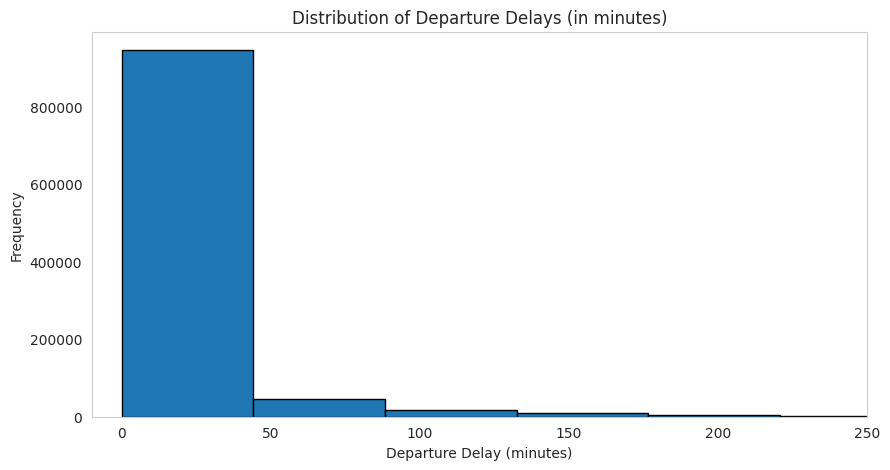

In [ ]:
# Summary statistics for delay-related columns
summary_stats = df_cleaned[['DEP_DELAY', 'ARR_DELAY', 'ELAPSED_TIME', 'DISTANCE']].describe()
print(summary_stats)

# Visualization 1: Distribution of Departure Delays
plt.figure(figsize=(10, 5))
plt.hist(df_cleaned['DEP_DELAY'], bins=50, edgecolor='black')
plt.title('Distribution of Departure Delays (in minutes)')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Frequency')
plt.xlim(-10, 250)
plt.grid()
plt.show()

**Chart 1: Distribution of Departure Delays** \

The chart shows the distribution of departure delays, measured in minutes. We see from the chart that the data is skewed to the righ. This means that most flights have minimal delays, but there are extreme delays exceeding 100+ minutes.

<ipython-input-39-425850237409>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  carrier_delay = df_cleaned.groupby('CARRIER_CODE')['ARR_DELAY'].mean().sort_values()


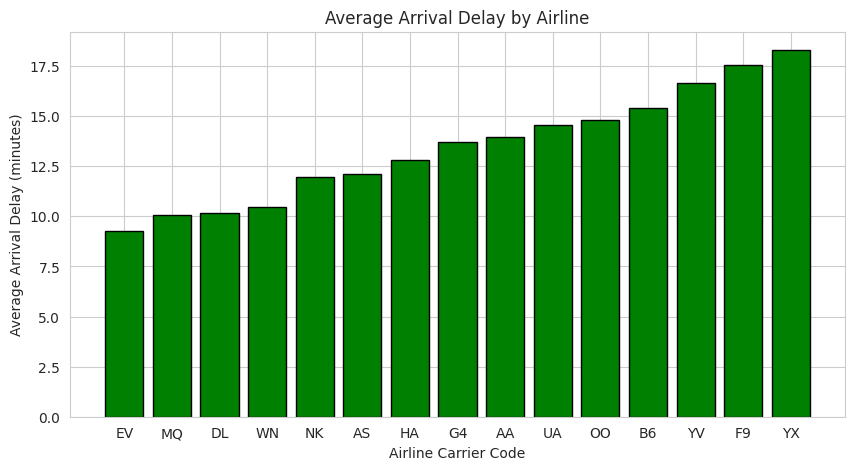

In [ ]:
# Visualization 2: Average Arrival Delay by Carrier
carrier_delay = df_cleaned.groupby('CARRIER_CODE')['ARR_DELAY'].mean().sort_values()

plt.figure(figsize=(10, 5))
plt.bar(carrier_delay.index, carrier_delay.values, color='green', edgecolor='black')
plt.title('Average Arrival Delay by Airline')
plt.xlabel('Airline Carrier Code')
plt.ylabel('Average Arrival Delay (minutes)')
plt.show()

**Chart 2: Average Arrival Delay by Airline** \

The chart shows the average arrival delay by airline. We see from the chart that some airlines  experience longer delays than others- YX (Republic Airways) having the longest. This is important because it can help optimize scheduling and airport resource allocation if we know which carriers are frequently having long delays.

<ipython-input-40-ff551942d890>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['MONTH'] = df_cleaned['FL_DATE'].dt.month


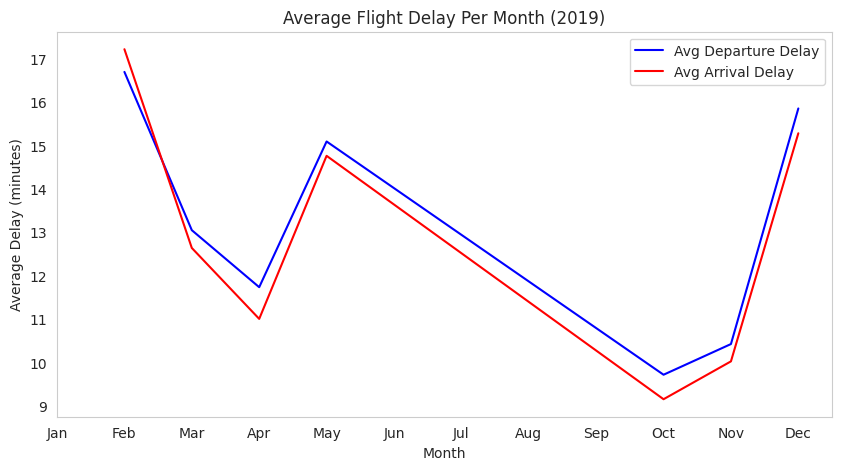

In [ ]:
# Visualization 3: Average Delay Per Month
# Extracting month from FL_DATE
df_cleaned['MONTH'] = df_cleaned['FL_DATE'].dt.month

# Calculating average departure and arrival delay per month
monthly_delays = df_cleaned.groupby('MONTH')[['DEP_DELAY', 'ARR_DELAY']].mean()

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(monthly_delays.index, monthly_delays['DEP_DELAY'], label='Avg Departure Delay', color='blue')
plt.plot(monthly_delays.index, monthly_delays['ARR_DELAY'], label='Avg Arrival Delay', color='red')
plt.title('Average Flight Delay Per Month (2019)')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid()
plt.show()

**Chart 3: Average Delay Per Month** \

The chart shows the average flight delays (departure and arrival) based on the month. We see from the chart that some months experience way less delays than other months (October being having the lowest avereage delay). This differences can be due to the holidays, weather, or other trends.

**Question 3**



1.   Explore patterns in the region i.e. the 3 states (AZ, NV, CA). Determine which region has the most air traffic. Comment on your findings and visualize the results. Note: it's important to explain your rational for determining what is "the most air traffic". For example, are you evaluating the frequency of flights or total flight time. Justify your response.
2.   For each region i.e. the 3 states (AZ, NV, CA), analyze the most popular outbound/destination airports. For example, if a flight originated in CA (at any of its airports), where do they often go? Comment on your findings and visualize the results for the top 5 destinations.
3. For each region, calculate the proportion* of flights from each airline/operator. Visualize the top 10 results. Explain the results.
*Hint: Don't forget that proportion is an explicit requirement.


**Approach for Most Air Traffic:** \

To determine which region has the most air traffic, we define "most air traffic" as the number of departing flights from each state (ORIGIN_ST) rather than total flight time. This approach is justified because departure frequency directly impacts airport congestion and delay patterns, while total flight time does not necessarily indicate traffic volume at an airport. A high number of flights means greater scheduling bottlenecks, runway congestion, and potential delays, making it a more relevant metric for our analysis. For instance, a long-haul flight takes more time but does not increase congestion at the airport after departure. On the other hand, multiple short-haul flights might have more impact on airport congestion due to frequent takeoffs and landings. \

Additionally, we decided to focus on departure states (ORIGIN_ST) rather than destination states (DEST_ST) because delays and congestion originate at the departing airport due to factors like turnaround time, air traffic control restrictions, and ground operations. Measuring flights by departure location provides a clearer picture of how busy an airport/state is, whereas a high number of incoming flights (DEST_ST) does not necessarily mean an airport is facing congestion issues.

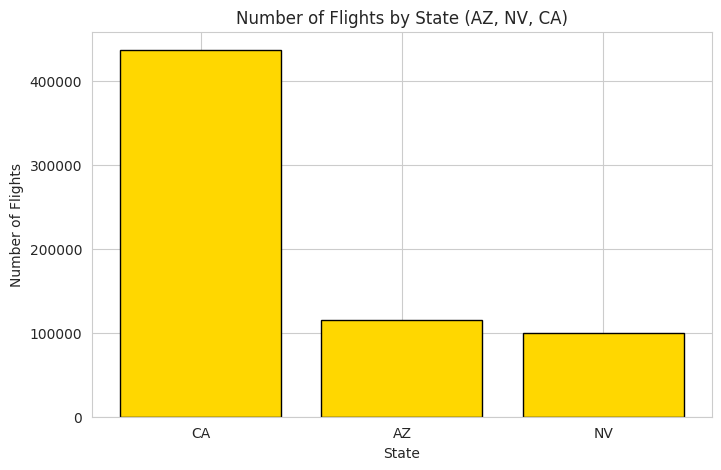

ORIGIN_ST
CA    437312
AZ    115435
NV    100228
Name: count, dtype: int64


In [ ]:
# Count the number of flights by origin state
flight_counts = df_cleaned['ORIGIN_ST'].value_counts()

# Filtering flight counts to only include AZ, NV, and CA
flight_counts_filtered = flight_counts.loc[['CA', 'AZ', 'NV']]

# Plotting the number of flights by states (AZ, NV, and CA)
plt.figure(figsize=(8, 5))
plt.bar(flight_counts_filtered.index, flight_counts_filtered.values, color='gold', edgecolor='black')
plt.title('Number of Flights by State (AZ, NV, CA)')
plt.xlabel('State')
plt.ylabel('Number of Flights')
plt.show()

# Display flight counts for only AZ, NV, and CA
print(flight_counts_filtered)

**Caption:** \

Based on our approach and the above chart, we find that California has the highest air traffic with 437,312 departing flights, significantly more than Arizona (115,435) and Nevada (100,228). This makes sense because California is a major international hubs (LAX, SFO, SAN) which contribute to high congestion levels. Additionally, California has a larger population than the other two states (both locally and tourists).

<ipython-input-42-ca07464e958a>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_destinations = df_filtered.groupby('ORIGIN_ST')['DEST'].value_counts().groupby(level=0).head(5)
<ipython-input-42-ca07464e958a>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_destinations = df_filtered.groupby('ORIGIN_ST')['DEST'].value_counts().groupby(level=0).head(5)


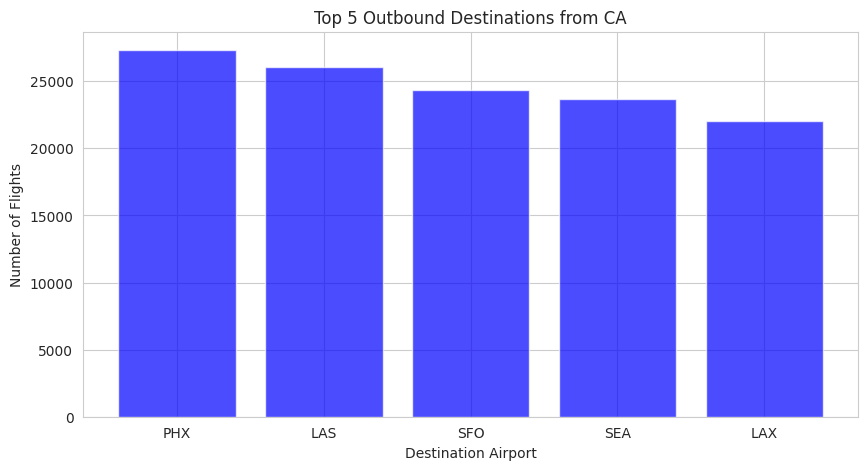

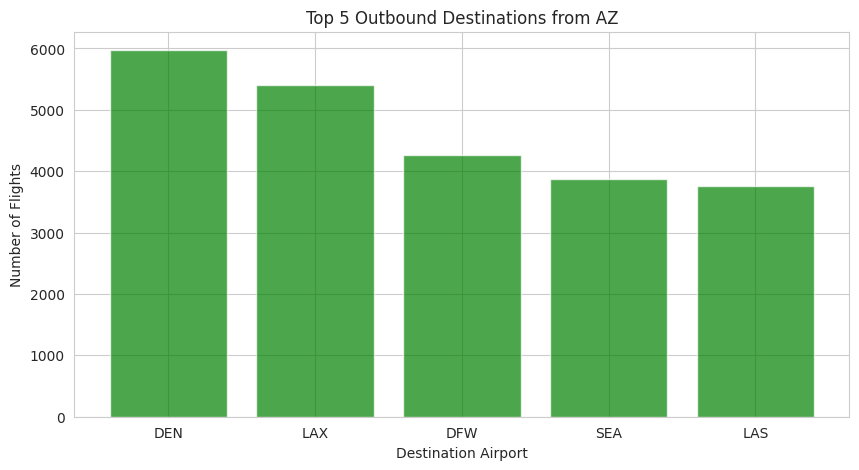

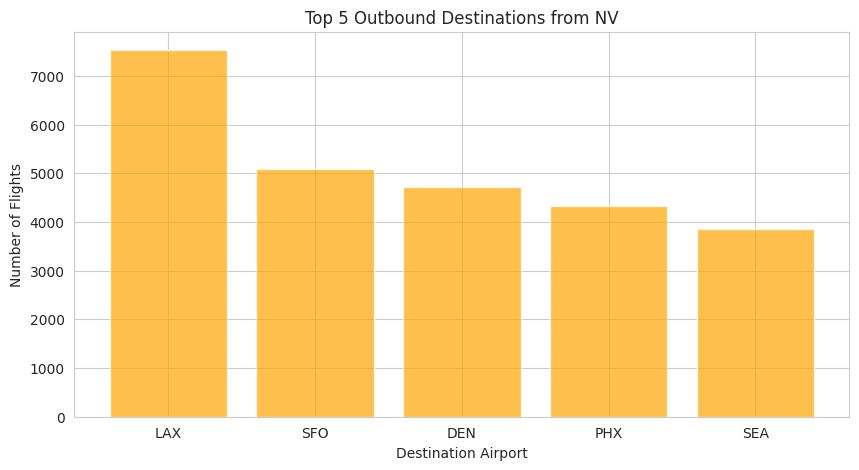

In [ ]:
# Filtering dataset for only the three states (AZ, NV, CA)
df_filtered = df_cleaned[df_cleaned['ORIGIN_ST'].isin(['CA', 'AZ', 'NV'])]

# Counting the most frequent destination airports for each state
top_destinations = df_filtered.groupby('ORIGIN_ST')['DEST'].value_counts().groupby(level=0).head(5)

# Reset Index to get Flight Count for the specific airport
top_destinations = top_destinations.reset_index(name='Flight Count')

colors = {'CA': 'blue', 'AZ': 'green', 'NV': 'orange'}
states = ['CA', 'AZ', 'NV']

# Plotting
# Create separate bar charts for each state
for state in states:
    state_data = top_destinations[top_destinations['ORIGIN_ST'] == state]
    plt.figure(figsize=(10, 5))
    plt.bar(state_data['DEST'], state_data['Flight Count'], color=colors[state], alpha=0.7)
    plt.title(f'Top 5 Outbound Destinations from {state}')
    plt.xlabel('Destination Airport')
    plt.ylabel('Number of Flights')
    plt.show()

**Caption:** \

Based on the charts, we see that from California, the most popular destinations include Phoenix (PHX), Las Vegas (LAS), San Francisco (SFO), Seattle (SEA), and Los Angeles (LAX). We see that the most popular destinations are either within California or still in the Western part of the US. For Arizona, its top destinations are Denver (DEN), Los Angeles (LAX), Dallas/Fort Worth (DFW), Seattle (SEA), and Las Vegas (LAS). Finally, Nevada's top destinations are Los Angeles (LAX), San Francisco (SFO), Denver (DEN), Phoenix (PHX), and Seattle (SEA).

<ipython-input-43-1bc7f20bef67>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_airline_counts = df_filtered.groupby(['ORIGIN_ST', 'CARRIER_CODE'])['FL_NUM'].count().reset_index()
<ipython-input-43-1bc7f20bef67>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_flights_by_state = state_airline_counts.groupby('State')['Flight Count'].sum().reset_index()
<ipython-input-43-1bc7f20bef67>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and

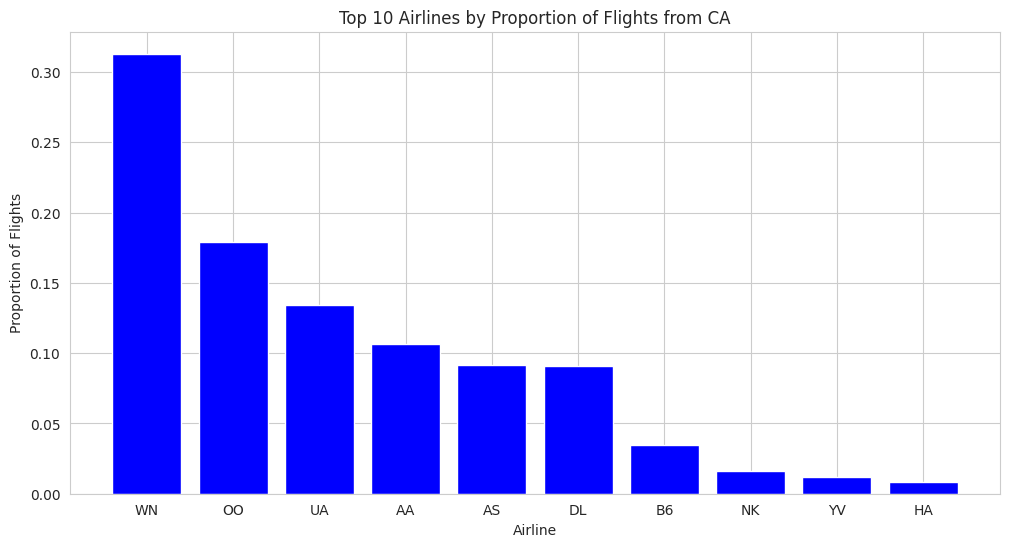

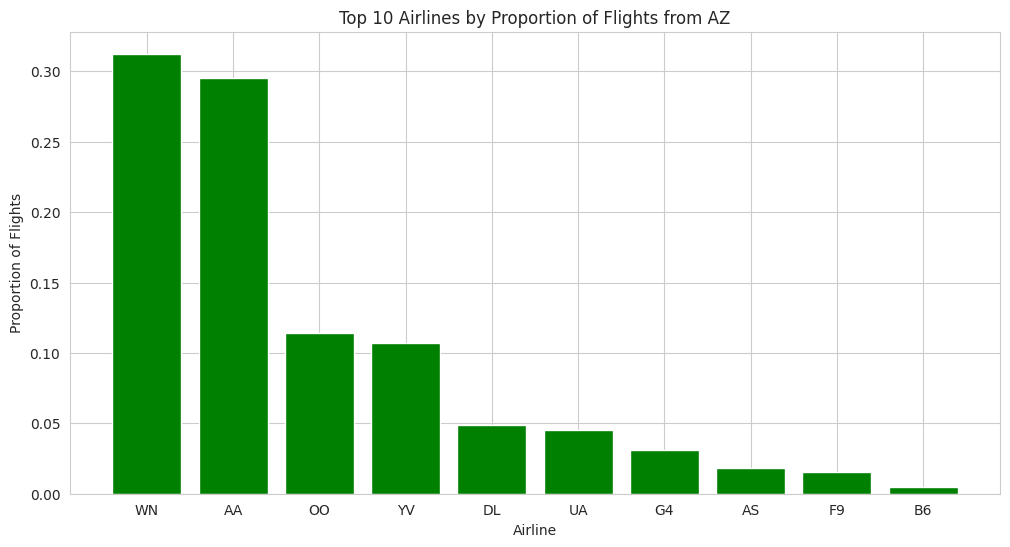

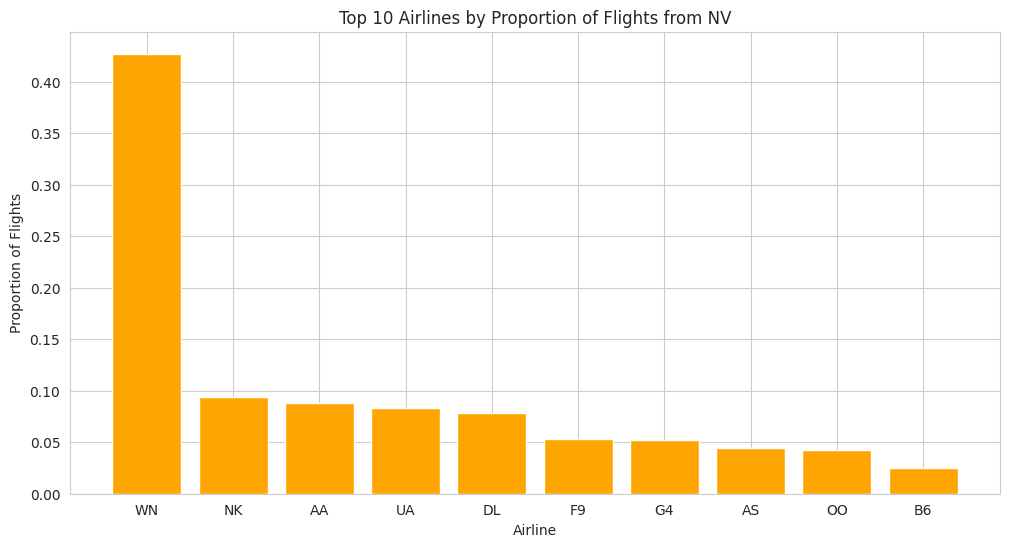

In [ ]:
  # Counting how many flights each airline has for every state (CA, AZ, NV)
  state_airline_counts = df_filtered.groupby(['ORIGIN_ST', 'CARRIER_CODE'])['FL_NUM'].count().reset_index()

  # Renaming columns to make the data easier to understand
  state_airline_counts.columns = ['State', 'Airline', 'Flight Count']

  # Calculating the total number of flights for each state
  total_flights_by_state = state_airline_counts.groupby('State')['Flight Count'].sum().reset_index()
  total_flights_by_state.columns = ['State', 'Total Flights']

  # Merging the total flights data with the airline counts
  state_airline_counts = state_airline_counts.merge(total_flights_by_state, on='State')

  # Calculatiing the proportion of flights for each airline
  state_airline_counts['Proportion'] = state_airline_counts['Flight Count'] / state_airline_counts['Total Flights']

  # Finding the top 10 airlines with the highest proportions for each state
  top_airlines_by_state = state_airline_counts.sort_values(by=['State', 'Proportion'], ascending=[True, False])
  top_airlines_by_state = top_airlines_by_state.groupby('State').head(10)

  # Plotting
  for state in states:
    state_data = top_airlines_by_state[top_airlines_by_state['State'] == state]
    plt.figure(figsize=(12, 6))
    plt.bar(state_data['Airline'], state_data['Proportion'], color=colors[state])
    plt.title(f'Top 10 Airlines by Proportion of Flights from {state}')
    plt.xlabel('Airline')
    plt.ylabel('Proportion of Flights')
    plt.show()

**Caption:** From the charts above shows the top 10 airlines by Proportion of Flights for each region. We see that Southwest Airlines (WN) leads with the highest proportion of flights, making up over 30% of the total in CA and NV and over 40% in NV. We also see that in California, there is more diversity in airline proportions due to the larger number of competing hubs and airlines operating within the state. But in AZ, Southwest Airlines and American Airlines accounts for 60% which shows how those two dominates within the state.

**Question 4**

1. Explore the carriers within the dataset and demonstrate at least TWO (2) patterns that you identified.
2. Analyze the minimum, maximum and average arrival and departure delays for each Airline/Carrier. Visualize the top 10 results. Explain the patterns in the delays and demonstrate: 1) which carriers are more prone to flight delays and 2) are the delays occurring more frequently in certain regions**?
**Tip: it is important to analyze the airlines across multiple airports and/or regions in order to conclude that they have a pattern of being late.

#Part 1
Explore the carriers within the dataset and emonstrate at least TWO (2) patterns


<ipython-input-44-546a1173f4e3>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  carrier_origin_counts = df_cleaned.groupby(['CARRIER_CODE', 'ORIGIN_ST']).size().reset_index(name='FLIGHT_COUNT')
<ipython-input-44-546a1173f4e3>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_states = (carrier_origin_counts.sort_values('FLIGHT_COUNT', ascending=False).groupby('CARRIER_CODE').head(1).reset_index())
<ipython-input-44-546a1173f4e3>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed

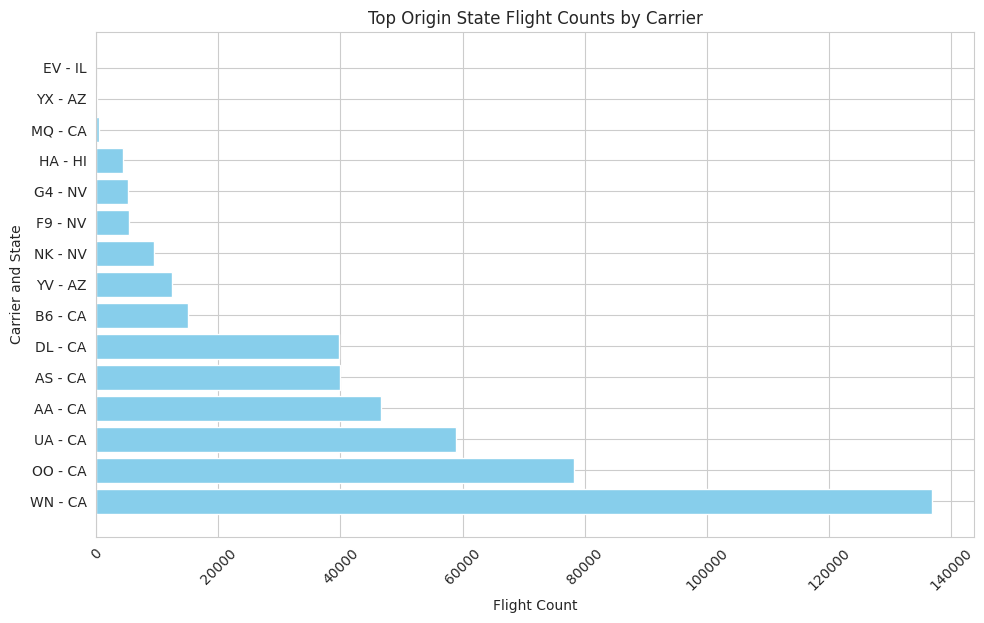

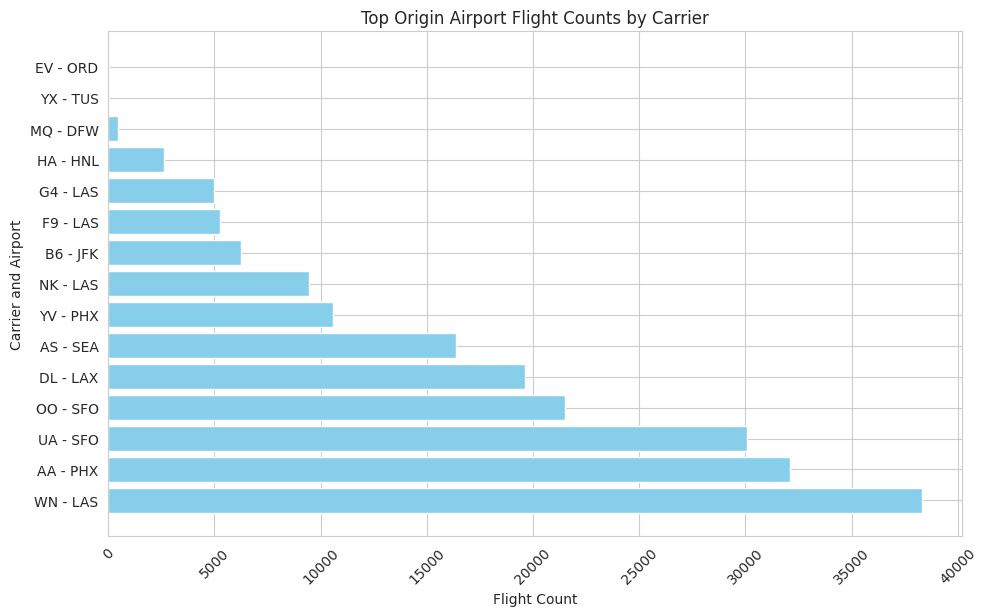

In [ ]:
# Getting carriers
carrier_origin_counts = df_cleaned.groupby(['CARRIER_CODE', 'ORIGIN_ST']).size().reset_index(name='FLIGHT_COUNT')
top_states = (carrier_origin_counts.sort_values('FLIGHT_COUNT', ascending=False).groupby('CARRIER_CODE').head(1).reset_index())
top_states = top_states.drop(columns='index')

# Printing top states for each carrier
top_states['LABEL'] = top_states['CARRIER_CODE'].astype(str) + ' - ' + top_states['ORIGIN_ST'].astype(str)

# Plot a horizontal bar chart with the state included in the labels
plt.figure(figsize=(10, 6))
plt.barh(top_states['LABEL'], top_states['FLIGHT_COUNT'], color='skyblue')

# Adding labels and title
plt.xlabel('Flight Count')
plt.ylabel('Carrier and State')
plt.title('Top Origin State Flight Counts by Carrier')
plt.tight_layout()
plt.xticks(rotation=45)

# Printing top airports for each carrier
carrier_airport_origin = df_cleaned.groupby(['CARRIER_CODE', 'ORIGIN']).size().reset_index(name='FLIGHT_COUNT')
top_origins = (carrier_airport_origin.sort_values('FLIGHT_COUNT', ascending=False).groupby('CARRIER_CODE').head(1).reset_index())
top_origins = top_origins.drop(columns='index')
top_origins['LABEL'] = top_origins['CARRIER_CODE'].astype(str) + ' - ' + top_origins['ORIGIN'].astype(str)
plt.figure(figsize=(10, 6))
plt.barh(top_origins['LABEL'], top_origins['FLIGHT_COUNT'], color='skyblue')
plt.xlabel('Flight Count')
plt.ylabel('Carrier and Airport')
plt.title('Top Origin Airport Flight Counts by Carrier')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

#First Interesting Pattern
One interesting pattern that has emerged throughout the data is how popular the west coast is.
A state in the west coast is the most popular state for flights to depart from in 11 out of the 14 airlines, the same is true for most popular airports.
This is intresting pattern that has emerged while CA and NV are the two most popular airports, there is still a large influence with seattle also having a large amount of depatures.

<ipython-input-45-e14d8f9fadd6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forYears = df_cleaned['MONTH'] = df_cleaned['FL_DATE'].dt.month
<ipython-input-45-e14d8f9fadd6>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_delays = df_cleaned.groupby(['MONTH', 'CARRIER_CODE'])['DEP_DELAY'].mean().reset_index()


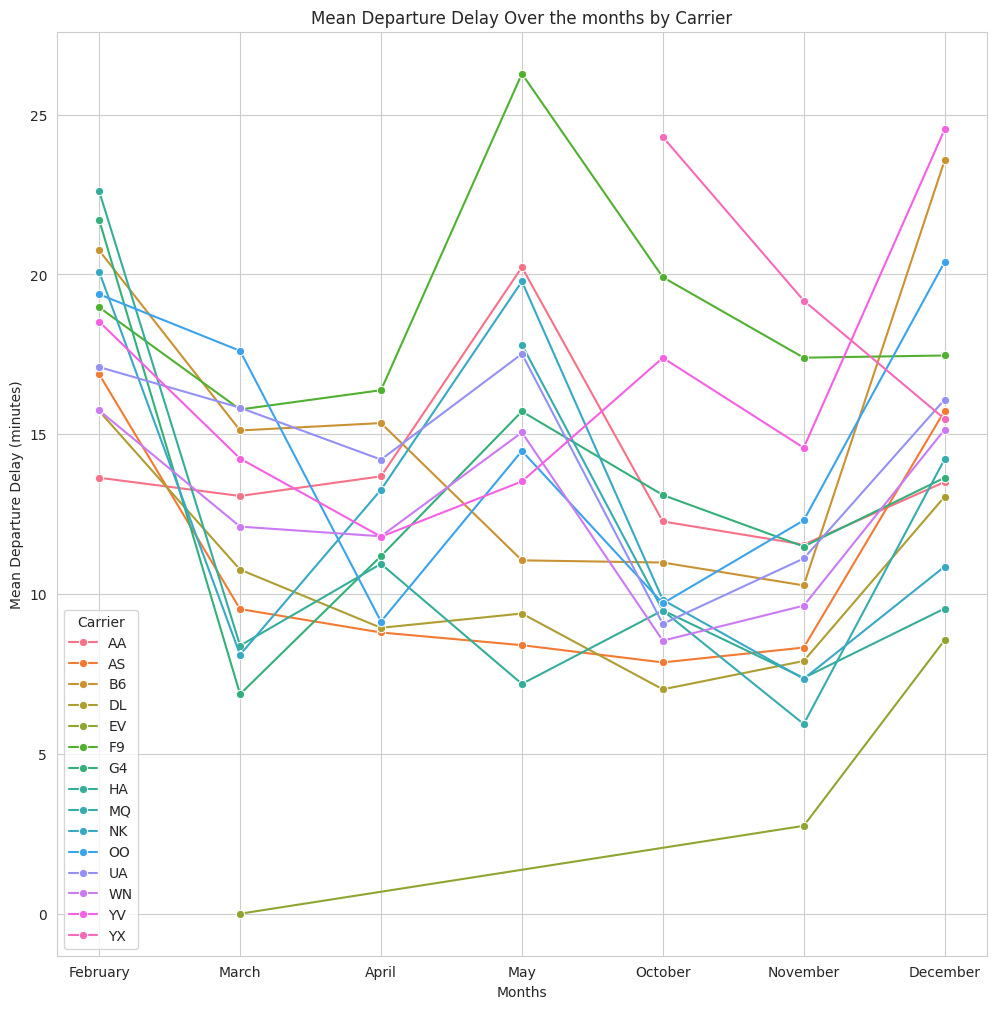

In [ ]:
forYears = df_cleaned['MONTH'] = df_cleaned['FL_DATE'].dt.month

# Getting all the months of 2019
months = {1: 'January',
          2: 'February',
          3: 'March',
          4: 'April',
          5: 'May',
          6: 'June',
          7: 'July',
          8: 'August',
          9: 'September',
          10: 'October',
          11: 'November',
          12: 'December'}

yearly_delays = df_cleaned.groupby(['MONTH', 'CARRIER_CODE'])['DEP_DELAY'].mean().reset_index()

# Converting each month to its string counterpart
yearly_delays['MONTH'] = yearly_delays['MONTH'].apply(lambda x: months[x])
plt.figure(figsize=(12, 12))

# Making a lineplot of each airline
sns.lineplot(data=yearly_delays, x='MONTH', y='DEP_DELAY', hue='CARRIER_CODE', marker='o')
plt.title('Mean Departure Delay Over the months by Carrier')
plt.xlabel('Months')
plt.ylabel('Mean Departure Delay (minutes)')
plt.legend(title='Carrier')
plt.grid(True)
plt.show()

# Second Interesting Pattern Accoring to the Data
An interesting pattern that emerges from the data is appears that all airlines delays seem to increase and decrease at the same rate. This is excluding EV which appears to have had some planes break down in june 2019 along with strikes wich makes it an instant outlier. However in terms of feburary every single airline carriers delays all go up then they all drop for march. They follow this pattern of rising and falling as one big group with only a couple airlines not following the pattern. This is very intresting showing that while some airlines are more reliable many of them still face the same issues over the different months that results in the rise and fall of delays.

#Part 2
Analyze the minimum, maximum and average arrival and departure delays for each Airline/Carrier. Visualize the top 10 results. Explain the patterns in the delays and demonstrate: 1) which carriers are more prone to flight delays and 2) are the delays occurring more frequently in certain regions**?

In [ ]:
# Creating data frame with mean sum and standard devaition
carrier_delays = df_cleaned.groupby('CARRIER_CODE').agg({
    'DEP_DELAY': ['mean', 'sum', 'std'],
    'ARR_DELAY': ['mean', 'sum', 'std']
})


<ipython-input-46-09d33988b10c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  carrier_delays = df_cleaned.groupby('CARRIER_CODE').agg({


<ipython-input-47-288e1bd4adb5>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  maxAndMins = df_cleaned.groupby('CARRIER_CODE').agg({


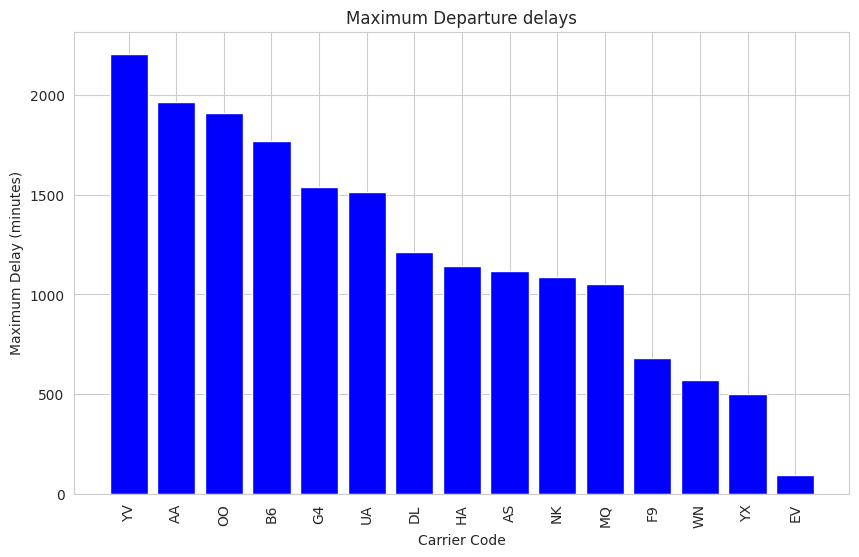

In [ ]:
# MAX AND MINIMUM
maxAndMins = df_cleaned.groupby('CARRIER_CODE').agg({
    'DEP_DELAY': ['min', 'max'],
    'ARR_DELAY': ['min', 'max']

})
maxAndMins = maxAndMins.sort_values(by=('DEP_DELAY', 'max'), ascending=False)
plt.figure(figsize=(10, 6))
plt.title('Maximum Departure delays')
plt.bar(maxAndMins.index, maxAndMins[('DEP_DELAY', 'max')], label='Maximum Departure Delay', color='blue')
plt.xlabel("Carrier Code")
plt.ylabel("Maximum Delay (minutes)")
plt.xticks(rotation=90)
plt.show()

#Chart
Every single airlines miniumum was 0 minutes.
Many airlines had large outlieres, with the airline that had the most delays for a single flight being American Airlines with an almost 40 hour delay, in second place was YV. Many flights had a few large outliers which could of been caused by sever weather delays



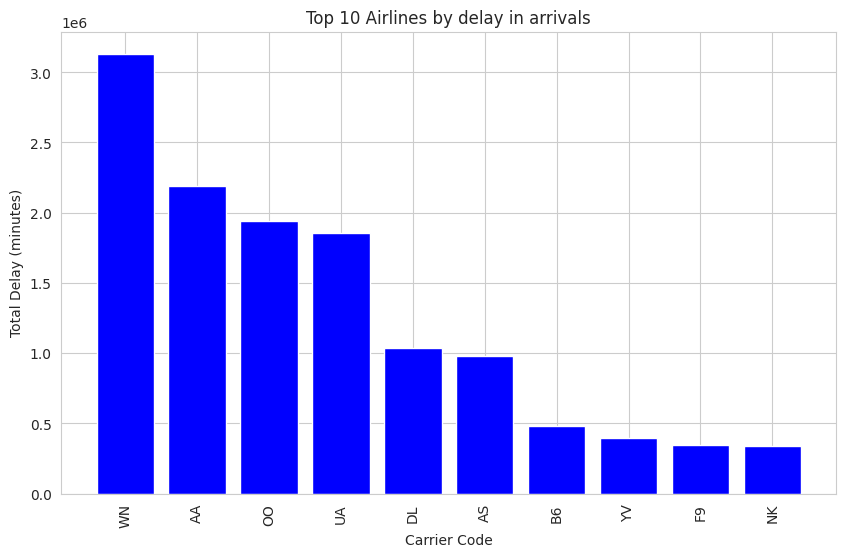

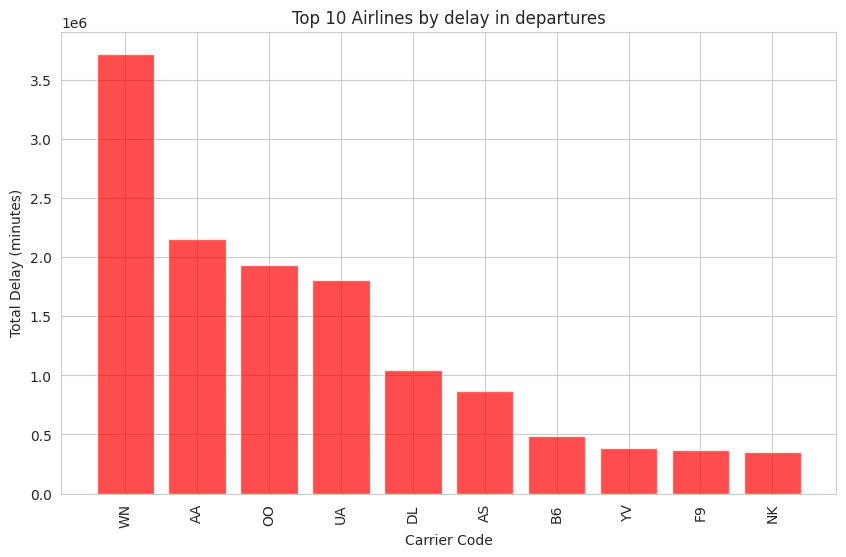

In [ ]:
# Sorting data (sum)
top_arr_delay = carrier_delays.sort_values(by=('ARR_DELAY', 'sum'), ascending=False).head(10)
top_dep_delay = carrier_delays.sort_values(by=('DEP_DELAY', 'sum'), ascending=False).head(10)

# Plotting Top 10 Airlines by delay in arrivals
plt.figure(figsize=(10, 6))
plt.title('Top 10 Airlines by delay in arrivals')
plt.bar(top_arr_delay.index, top_arr_delay[('ARR_DELAY', 'sum')], label='Total Arrival Delay', color='blue')
plt.xlabel("Carrier Code")
plt.ylabel("Total Delay (minutes)")
plt.xticks(rotation=90)
plt.show()


# Plotting Top 10 Airlines by delay in departures
plt.figure(figsize=(10, 6))
plt.title('Top 10 Airlines by delay in departures')
plt.bar(top_dep_delay.index, top_dep_delay[('DEP_DELAY', 'sum')], label='Total Departure Delay', color='red', alpha=0.7)
plt.xlabel("Carrier Code")
plt.ylabel("Total Delay (minutes)")
plt.xticks(rotation=90)
plt.show()

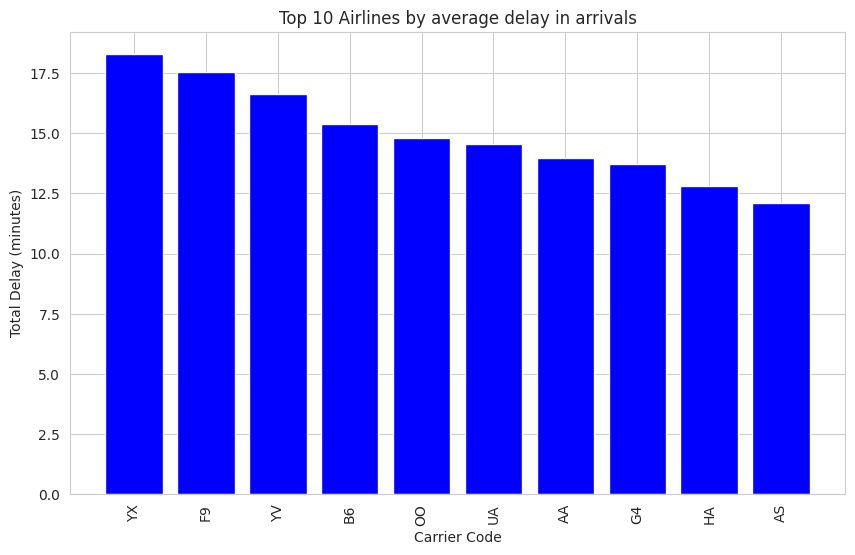

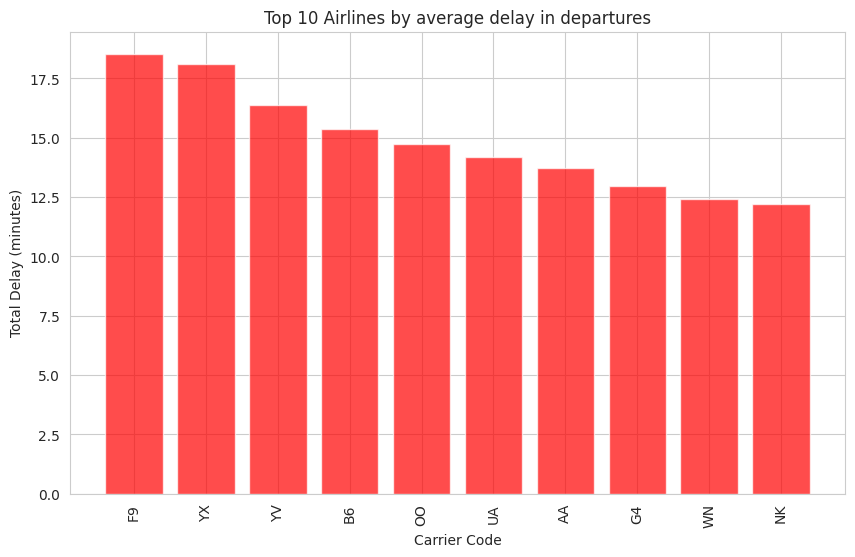

In [ ]:
# Sorting data (mean)
top_arr_delay = carrier_delays.sort_values(by=('ARR_DELAY', 'mean'), ascending=False).head(10)
top_dep_delay = carrier_delays.sort_values(by=('DEP_DELAY', 'mean'), ascending=False).head(10)

# Plotting Top 10 Airlines by average delay in arrivals
plt.figure(figsize=(10, 6))
plt.title('Top 10 Airlines by average delay in arrivals')
plt.bar(top_arr_delay.index, top_arr_delay[('ARR_DELAY', 'mean')], label='Total Arrival Delay', color='blue')
plt.xlabel("Carrier Code")
plt.ylabel("Total Delay (minutes)")
plt.xticks(rotation=90)
plt.show()


# Plotting Top 10 Airlines by average delay in departures
plt.figure(figsize=(10, 6))
plt.title('Top 10 Airlines by average delay in departures')
plt.bar(top_dep_delay.index, top_dep_delay[('DEP_DELAY', 'mean')], label='Total Departure Delay', color='red', alpha=0.7)
plt.xlabel("Carrier Code")
plt.ylabel("Total Delay (minutes)")
plt.xticks(rotation=90)
plt.show()

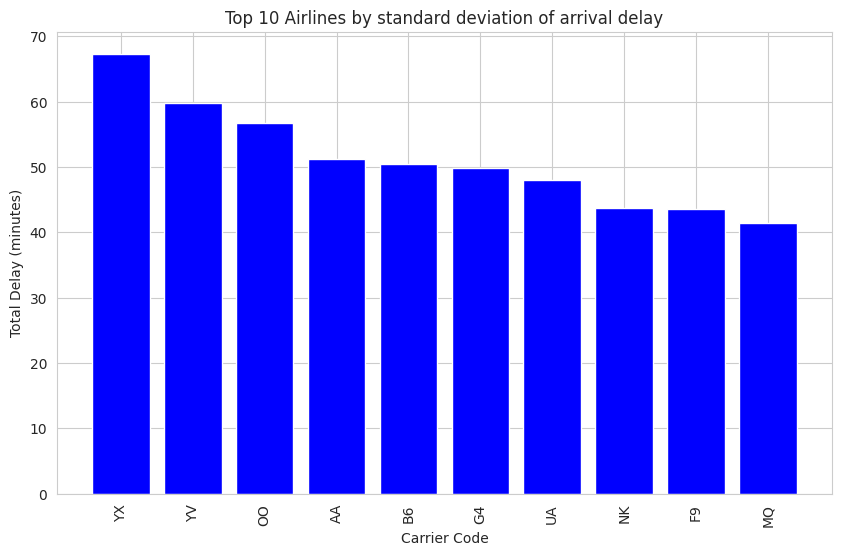

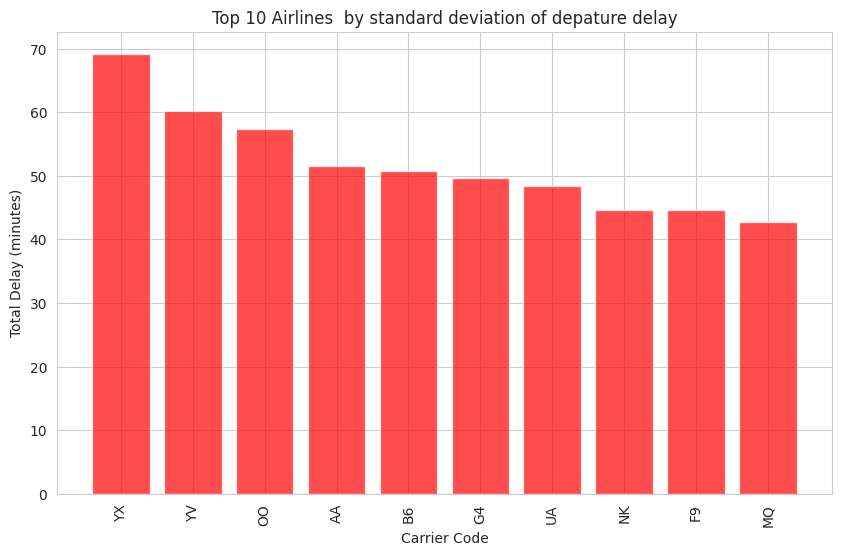

In [ ]:
# Sorting data (std)
top_arr_delay = carrier_delays.sort_values(by=('ARR_DELAY', 'std'), ascending=False).head(10)
top_dep_delay = carrier_delays.sort_values(by=('DEP_DELAY', 'std'), ascending=False).head(10)
plt.figure(figsize=(10, 6))

# Plotting Top 10 Airlines by standard deviation of arrival delay
plt.title('Top 10 Airlines by standard deviation of arrival delay')
plt.bar(top_arr_delay.index, top_arr_delay[('ARR_DELAY', 'std')], label='Total Arrival Delay', color='blue')
plt.xlabel("Carrier Code")
plt.ylabel("Total Delay (minutes)")
plt.xticks(rotation=90)
plt.show()

# Plotting Top 10 Airlines by standard deviation of depature delay
plt.figure(figsize=(10, 6))
plt.title('Top 10 Airlines  by standard deviation of depature delay')
plt.bar(top_dep_delay.index, top_dep_delay[('DEP_DELAY', 'std')], label='Total Departure Delay', color='red', alpha=0.7)
plt.xlabel("Carrier Code")
plt.ylabel("Total Delay (minutes)")
plt.xticks(rotation=90)
plt.show()

# Caption for graphs:
## Airlines with most server average dealys
- Frontier (F9)
  - Has an average deperature delay of roughly 20 minutes, and arrival delay of 19minutes
  - F9 also has a very large standard deviation
- YX
  - Possibly the worst airline in terms of consistency having a deviation over 60 minutes
  - also ranking second worst in average delay in deperatures/arrivals
- JetBlue
  - is third with planes on average being late by 16 minutes
  - the deviation is also somewhat high
- United Airlines, American Airlines, and YV are all similar
  -Planes are on average 15 minutes late all with roughly 45 minutes of standard deviations

## Airlines with worst total delays
- Southwest with over 6million
- American with over 4million
- United with over 3.6million
- SkyWest with over 3.3million

**Take aways:** \
YX and Frontier are the two worst airlines in terms of consistency and average delays. These have high delays but also a high amount of variance which can add stress for possible passengers. Many airlines with a large amount of flights have a large amount of total delay time, but on average per flight is actually not too terrible.

# Are the delays occurring more frequently in certain regions**?
# PART 1 Analyzing for 5 Airlines
American, Jetblue, F9, YX, and United

<ipython-input-51-a73cfc91432d>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_delays = carrier_info.groupby('ORIGIN_ST')['DEP_DELAY'].mean()


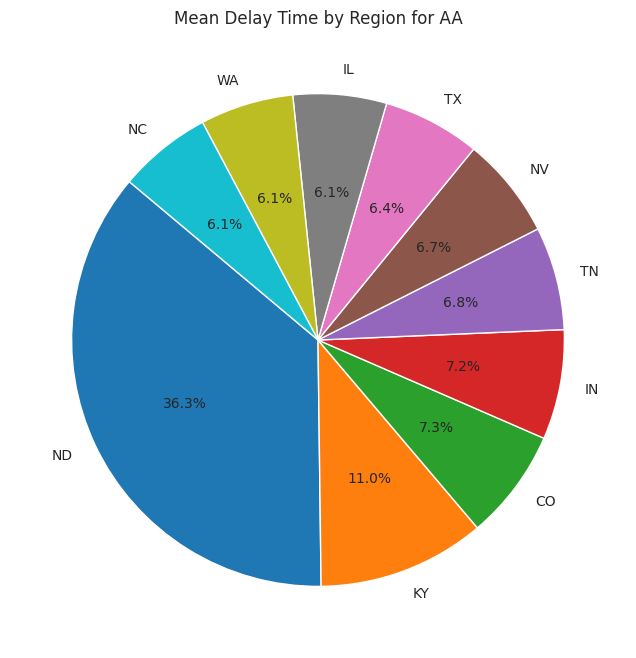

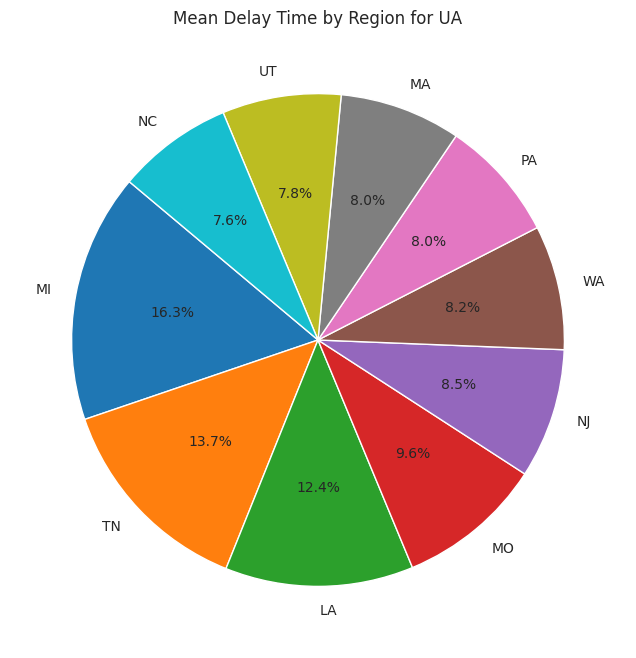

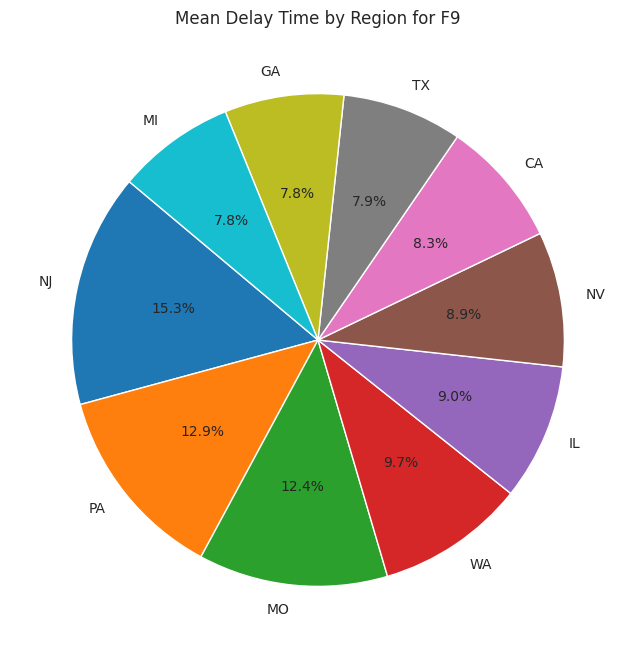

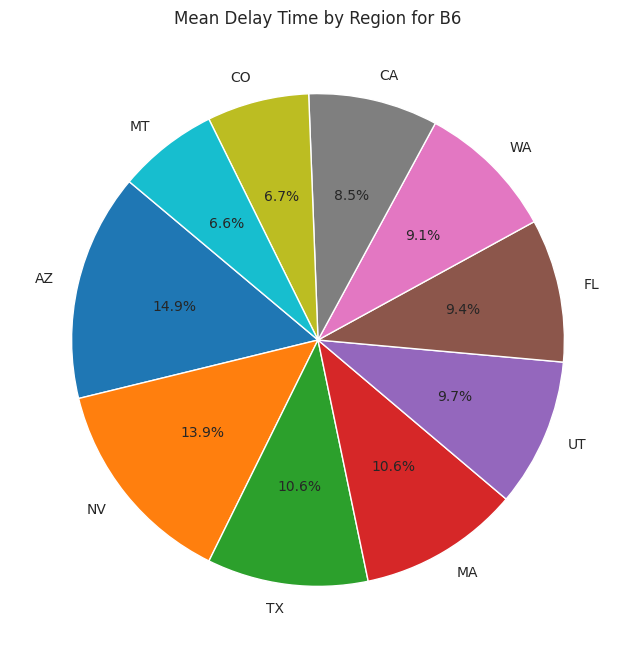

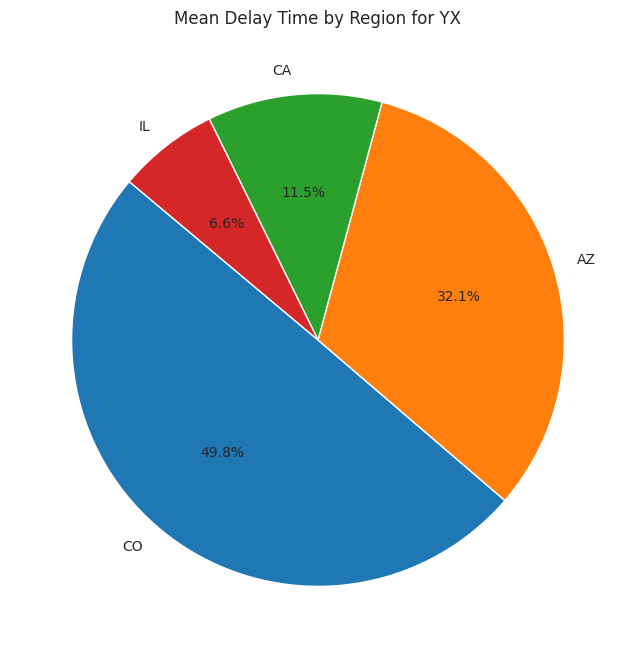

In [ ]:
carriers = ['AA', 'UA', 'F9', 'B6', 'YX']

# Pie Chart Showing Mean Delay by Region
for carrier in carriers:
  carrier_info = df_cleaned[df_cleaned['CARRIER_CODE'] == carrier]
  region_delays = carrier_info.groupby('ORIGIN_ST')['DEP_DELAY'].mean()
  top_regions = region_delays.sort_values(ascending=False).dropna().head(10)

  plt.figure(figsize=(8, 8))
  plt.pie(top_regions, labels=top_regions.index, autopct='%1.1f%%', startangle=140)
  plt.title(f'Mean Delay Time by Region for {carrier}')
  plt.show()

**Chart:** Pie charts that show mean delay time by region:
- The data does not contain one state that ranks highly on each of the airlines
- However an intresting thing is that 3/5 airlines have 1 or two states that are large outlierse in terms of delays

American Airlines.
- Worst state by far is North Dekota making roughly 33%
United Airlines
- Worst state by far is Alabama making roughly 35%

YX
- Has two worst states with Arizone and Colorado both making up over 70% of delays in the states

F9/B6
- Most states are equal with each other in terms of delays


#Part 2 Worst states

<ipython-input-52-f7224bc34814>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_delays = df_cleaned.groupby('ORIGIN_ST')['DEP_DELAY'].mean()


count    43.000000
mean     13.134652
std       4.843961
min       4.611111
25%      10.792691
50%      12.210243
75%      14.520611
max      37.106481
Name: DEP_DELAY, dtype: float64


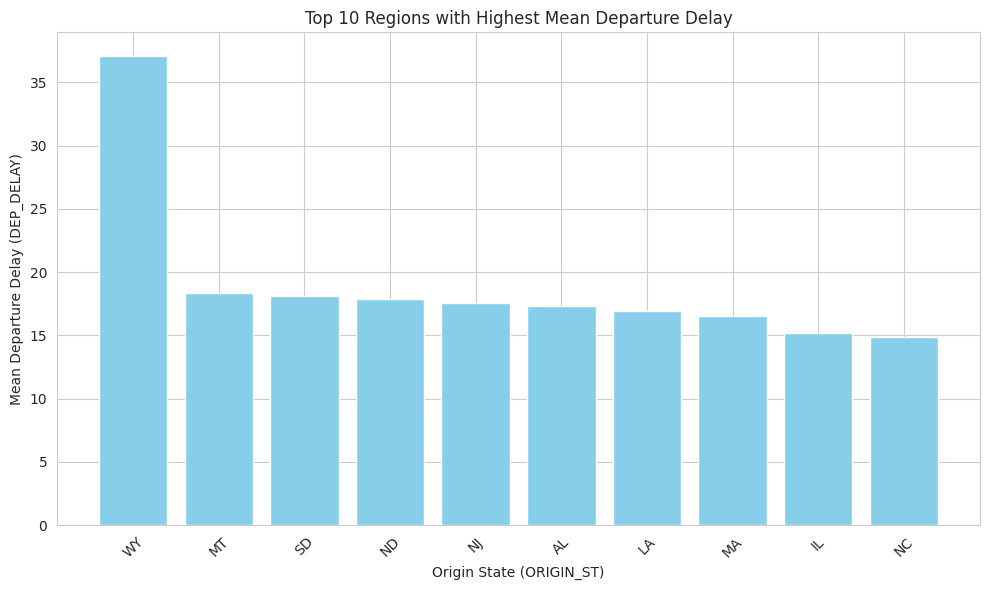

In [ ]:
# Getting the departure delay mean for top 10 regions (Worst Regions)
region_delays = df_cleaned.groupby('ORIGIN_ST')['DEP_DELAY'].mean()
top_regions = region_delays.sort_values(ascending=False).dropna().head(10)
print(region_delays.describe())

# Plotting Top 10 Regions with Highest Mean Departure Delay
plt.figure(figsize=(10, 6))
plt.bar(top_regions.index, top_regions.values, color='skyblue')
plt.xlabel('Origin State (ORIGIN_ST)')
plt.ylabel('Mean Departure Delay (DEP_DELAY)')
plt.title('Top 10 Regions with Highest Mean Departure Delay')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

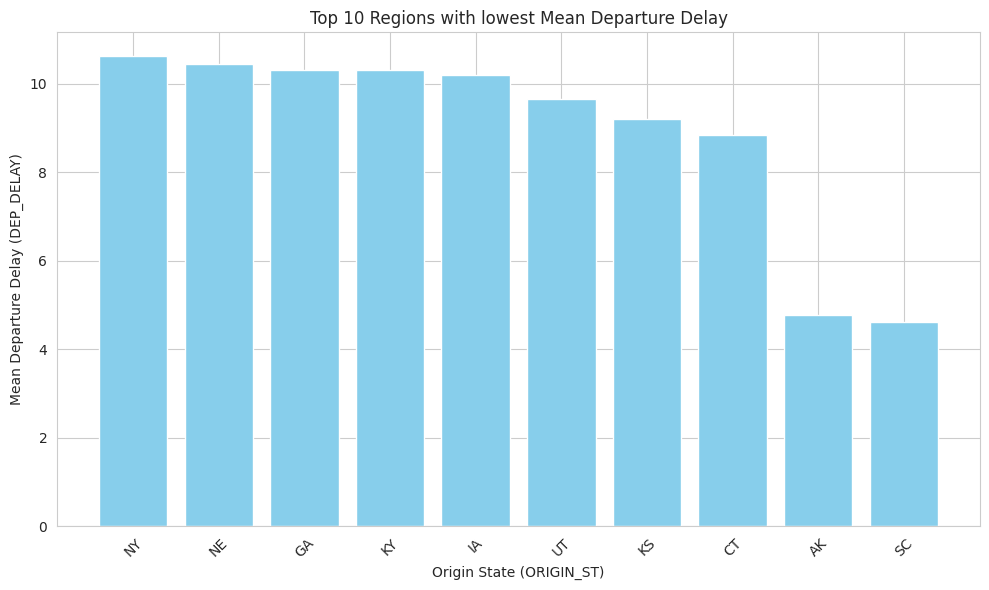

In [ ]:
# Getting the 10 best regions
best_regions = region_delays.sort_values(ascending=False).dropna().tail(10)

# Plotting Top 10 Regions with lowest Mean Departure Delay
plt.figure(figsize=(10, 6))
plt.bar(best_regions.index, best_regions.values, color='skyblue')
plt.xlabel('Origin State (ORIGIN_ST)')
plt.ylabel('Mean Departure Delay (DEP_DELAY)')
plt.title('Top 10 Regions with lowest Mean Departure Delay')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Caption:** These two bar plots show the top 10 best and worst states in terms of their mean for depeature times. The difference between the max and miniumum is 13 minutes. The average is also 13.8 minute, with 75% of the states having less than 16 minutes of delay. There appears to be three regions that are worst, these being South Carolina, Wyoming, and New Jersey all with delays over 20 minutes.

**Question 5**

1. Evaluate which airlines have the best performance in the region. Display the top 10 airlines.
Note: it's important to explain your rational for determining "the best performance".
2. For each airline, ensure that you calculate their total flight hours for each month. Explain and visualize the results for the top 10 airlines.
Hint: the total flight hours is not equivalent to the frequency of flights, and ensure that you display the total hours and not the total minutes.

**Approach:** In order to determine "the best performance" for an airline, I looked at each variable and determined whether it would be related to performance. Out of all the variables, DEP_DELAY and ARR_DELAY seemed to suit this the most. In order to calculate the "best performance", I will add DEP_DELAY and ARR_DELAY together, and take the 10 lowest sums. Since a higher amount of delay time means worse performance, the lowest 10 sums would be the airlines that are best performing.

<ipython-input-54-2920b4449d7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["TOTAL_DELAY"] = df_cleaned["DEP_DELAY"] + df_cleaned["ARR_DELAY"]


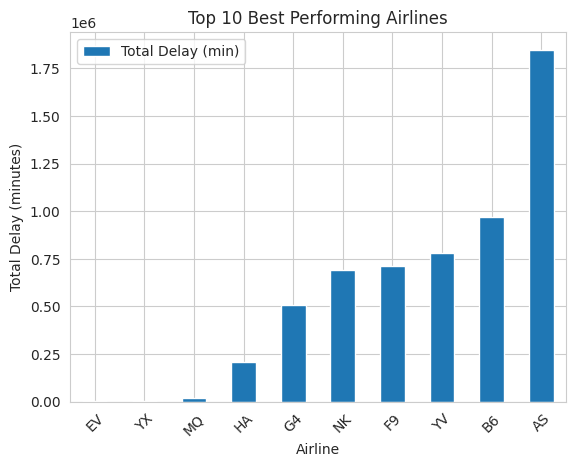

In [ ]:
# calculate total delay for all flights(departure delay + arrival delay)
df_cleaned["TOTAL_DELAY"] = df_cleaned["DEP_DELAY"] + df_cleaned["ARR_DELAY"]

# use total delay and get total delay per airline
df_airline_performance = df_cleaned.groupby("CARRIER_CODE", observed = False)[["TOTAL_DELAY", "ELAPSED_TIME"]].sum().reset_index()
df_airline_performance.columns = ["AIRLINE", "TOTAL_DELAY", "TOTAL_FLIGHT_HOURS"]

# get the 10 best performing airlines(10 lowest airlines based on delay)
df_lowest_10_airlines = df_airline_performance.nsmallest(10, "TOTAL_DELAY").sort_values("TOTAL_DELAY", ascending=True)

# bar chart to show the top 10 airlines based on best performance
df_lowest_10_airlines.plot(x="AIRLINE", y=["TOTAL_DELAY"], kind="bar")
plt.title("Top 10 Best Performing Airlines") # give a title for the chart
plt.xlabel("Airline") # give a title for the x axis
plt.ylabel("Total Delay (minutes)") # give a title for the y axis
plt.xticks(rotation=45) # rotate by 45 degrees for readability
plt.legend(["Total Delay (min)"])
plt.show() # show chart

The bar chart above shows the 10 best performing airlines based on lowest total delay(departure delay + arrival delay). Based on the chart, EV is the best performing airline whereas AS is the 10th best performing airline.

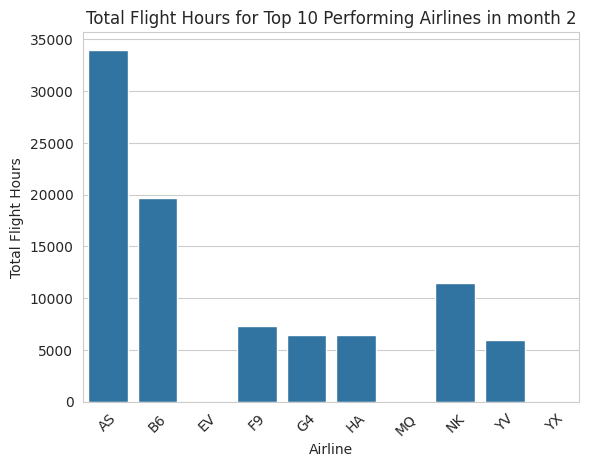

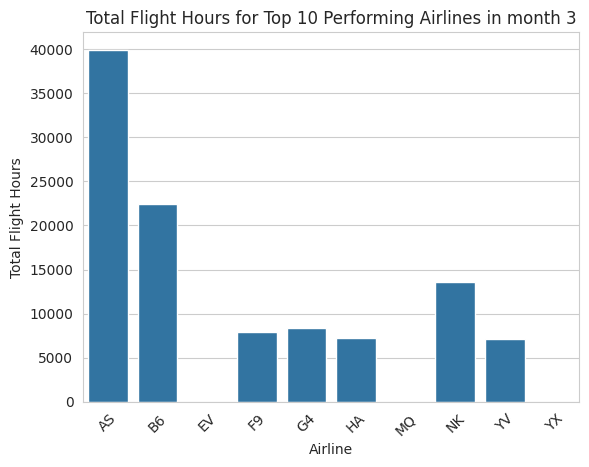

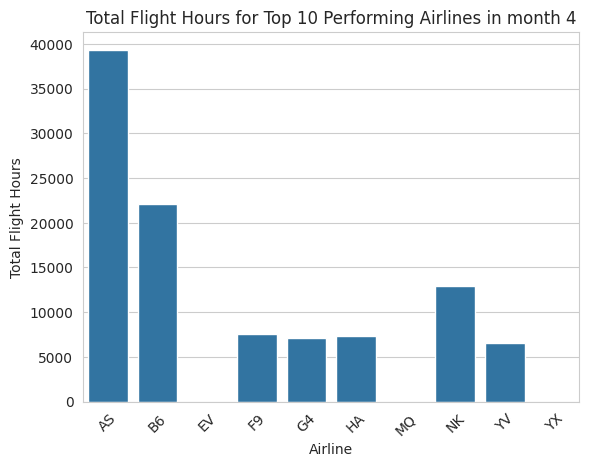

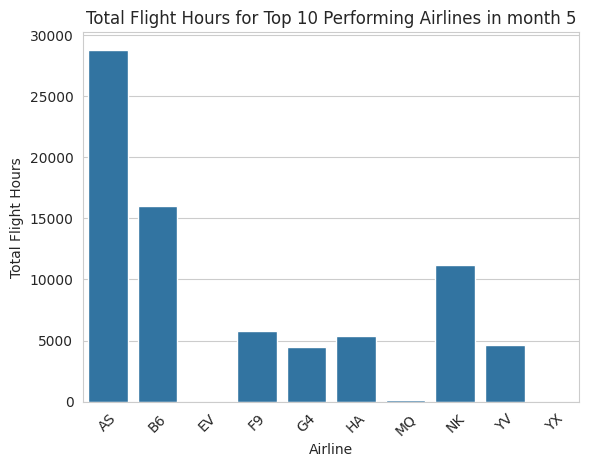

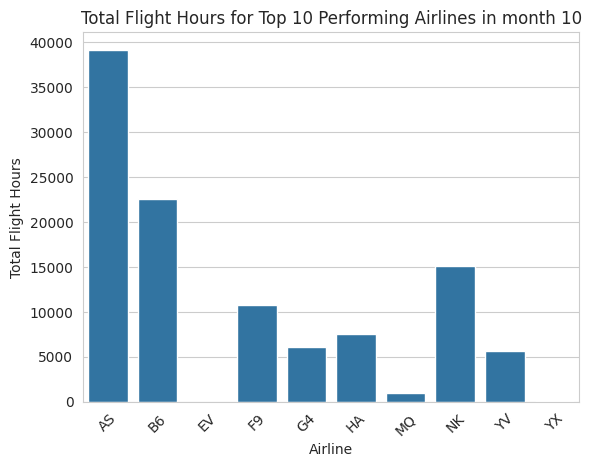

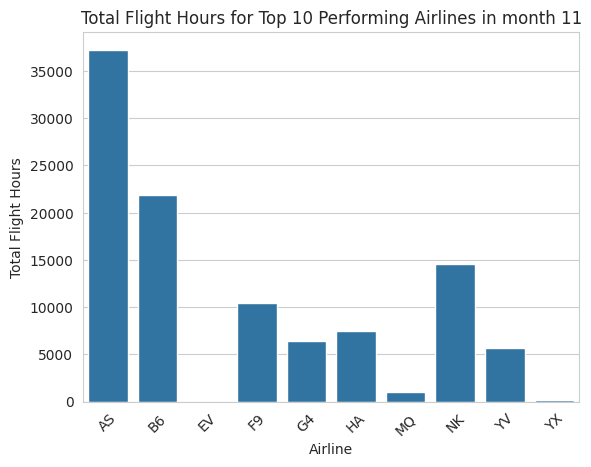

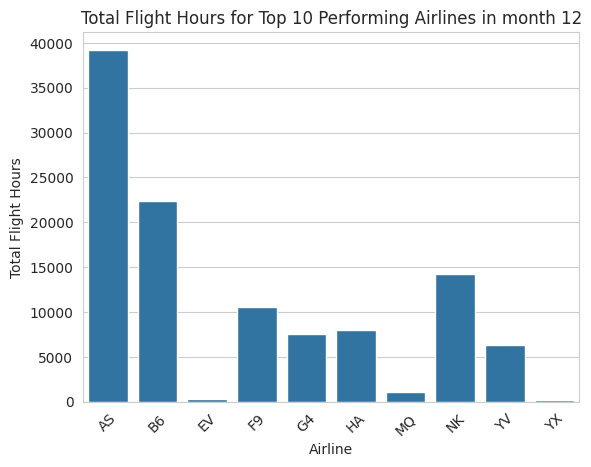

In [ ]:
# sort dataset by airline and month
df_flight_hours = df_cleaned.groupby(["CARRIER_CODE", "MONTH"], observed = False)["ELAPSED_TIME"].sum().reset_index()

# convert from minutes to hours
df_flight_hours["TOTAL_FLIGHT_HOURS"] = df_flight_hours["ELAPSED_TIME"] / 60

# convert to string
df_lowest_10_airlines["AIRLINE"] = df_lowest_10_airlines["AIRLINE"].astype(str)
df_flight_hours["CARRIER_CODE"] = df_flight_hours["CARRIER_CODE"].astype(str)

# only get the total flight hours for airlines that were in the lowest 10 airlines based on delay
df_flight_hours_lowest10 = df_flight_hours[df_flight_hours["CARRIER_CODE"].isin(df_lowest_10_airlines["AIRLINE"])].copy()

# get all the unique months that are in the dataset for the top 10 best performing airlines
unique_months = sorted(df_flight_hours_lowest10["MONTH"].unique())

# for statement to make a chart for each month
for month in unique_months:
    # get data for current month
    df_months = df_flight_hours_lowest10[df_flight_hours_lowest10["MONTH"] == month]
    sns.barplot(data=df_months, x="CARRIER_CODE", y="TOTAL_FLIGHT_HOURS")
    plt.title(f"Total Flight Hours for Top 10 Performing Airlines in month {month}")
    plt.xlabel("Airline")
    plt.ylabel("Total Flight Hours")
    plt.xticks(rotation=45)
    plt.show()

**Caption:** Overall, the top 10 airlines did not fluctuate much throughout the 12 months. However, I did notice that most of these airlines had a very low amount of total flight hours, which explains why they were the top 10 performing airlines. They had a low total delay(minutes) because they had lower flight hours whereas bigger airlines would experience more delays because of more flights. The exceptions are AS, B6 and possibly NK. None of the other airlines even reaches 10 thousand flight hours per month.

**Question 6**

Select any THREE (3) aircraft***, and explore the data to analyze the following for each aircraft:

1. Indicate which airline operates the selected aircraft and where it often travels.
2. Arrival and departure delays at the airports where it traveled.
3. Create summary statistics on the distance traveled.
Analyze all the results in 6.1-6.3 to identify any patterns that are evident. Explain your findings and visualize ALL results.
***Note: the TAIL_NUM can help you to identify each unique aircraft.


Airlines Operating Selected Aircraft:
     TAIL_NUM CARRIER_CODE
882   N726SK           OO
888   N728SK           OO
923   N742SK           OO


<ipython-input-56-c2d75f599deb>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  common_routes = df_selected.groupby(['TAIL_NUM', 'ORIGIN', 'DEST']).size().reset_index(name='Flight_Count')



Common Routes of Selected Aircraft:
           TAIL_NUM ORIGIN DEST  Flight_Count
0            215NV    ABQ  ABQ             0
1            215NV    ABQ  ACV             0
2            215NV    ABQ  AMA             0
3            215NV    ABQ  ANC             0
4            215NV    ABQ  ASE             0
...            ...    ...  ...           ...
107077495   N999JQ    YUM  TUS             0
107077496   N999JQ    YUM  TVC             0
107077497   N999JQ    YUM  TYS             0
107077498   N999JQ    YUM  XNA             0
107077499   N999JQ    YUM  YUM             0

[107077500 rows x 4 columns]


<ipython-input-56-c2d75f599deb>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delay_summary = df_selected.groupby('TAIL_NUM')[['DEP_DELAY', 'ARR_DELAY']].describe()



Delay Summary of Selected Aircraft:
          DEP_DELAY                              ARR_DELAY                   \
             count mean std min 25% 50% 75% max     count mean std min 25%   
TAIL_NUM                                                                     
215NV          0.0  NaN NaN NaN NaN NaN NaN NaN       0.0  NaN NaN NaN NaN   
216NV          0.0  NaN NaN NaN NaN NaN NaN NaN       0.0  NaN NaN NaN NaN   
217NV          0.0  NaN NaN NaN NaN NaN NaN NaN       0.0  NaN NaN NaN NaN   
218NV          0.0  NaN NaN NaN NaN NaN NaN NaN       0.0  NaN NaN NaN NaN   
219NV          0.0  NaN NaN NaN NaN NaN NaN NaN       0.0  NaN NaN NaN NaN   
...            ...  ...  ..  ..  ..  ..  ..  ..       ...  ...  ..  ..  ..   
N998AN         0.0  NaN NaN NaN NaN NaN NaN NaN       0.0  NaN NaN NaN NaN   
N998AT         0.0  NaN NaN NaN NaN NaN NaN NaN       0.0  NaN NaN NaN NaN   
N998JE         0.0  NaN NaN NaN NaN NaN NaN NaN       0.0  NaN NaN NaN NaN   
N998NN         0.0  NaN Na

<ipython-input-56-c2d75f599deb>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_summary = df_selected.groupby('TAIL_NUM')['DISTANCE'].describe()



Distance Summary of Selected Aircraft:
           count  mean  std  min  25%  50%  75%  max
TAIL_NUM                                           
215NV       0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
216NV       0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
217NV       0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
218NV       0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
219NV       0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
...         ...   ...  ...  ...  ...  ...  ...  ...
N998AN      0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
N998AT      0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
N998JE      0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
N998NN      0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
N999JQ      0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN

[4759 rows x 8 columns]


<ipython-input-56-c2d75f599deb>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_selected, x='TAIL_NUM', y='ARR_DELAY', palette=colors)
<ipython-input-56-c2d75f599deb>:29: UserWarning: 
The palette list has fewer values (3) than needed (4759) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df_selected, x='TAIL_NUM', y='ARR_DELAY', palette=colors)


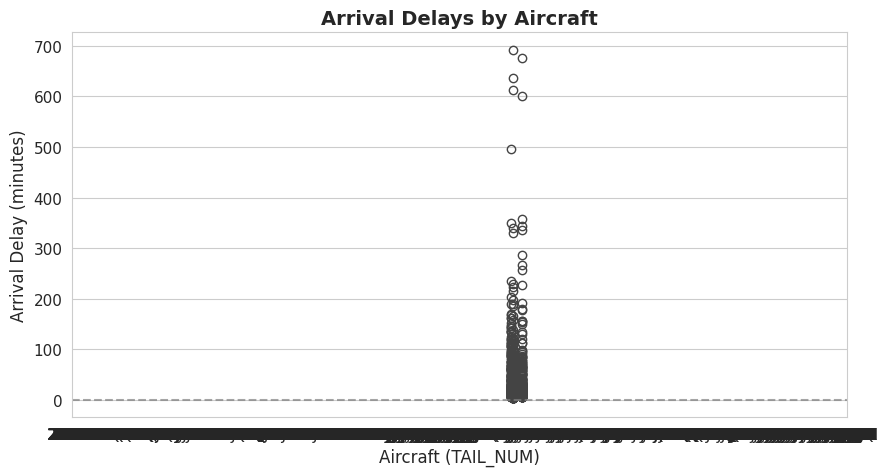

In [ ]:
# Select three aircraft based on the most flights
top_aircraft = df_cleaned['TAIL_NUM'].value_counts().head(3).index.tolist()
df_selected = df_cleaned[df_cleaned['TAIL_NUM'].isin(top_aircraft)]

# Identify the airlines operating these aircraft
airlines_operating = df_selected[['TAIL_NUM', 'CARRIER_CODE']].drop_duplicates()
print("\nAirlines Operating Selected Aircraft:\n", airlines_operating)

# Identify common routes
common_routes = df_selected.groupby(['TAIL_NUM', 'ORIGIN', 'DEST']).size().reset_index(name='Flight_Count')
print("\nCommon Routes of Selected Aircraft:\n", common_routes)

# Analyze delays
delay_summary = df_selected.groupby('TAIL_NUM')[['DEP_DELAY', 'ARR_DELAY']].describe()
print("\nDelay Summary of Selected Aircraft:\n", delay_summary)

# Analyze distance traveled
distance_summary = df_selected.groupby('TAIL_NUM')['DISTANCE'].describe()
print("\nDistance Summary of Selected Aircraft:\n", distance_summary)

# Set the Seaborn style
sns.set_style("whitegrid")

# Define color palette explicitly
colors = sns.color_palette("husl", len(df_selected['TAIL_NUM'].unique()))  # Assign unique colors per aircraft

# Arrival Delays by Aircraft
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_selected, x='TAIL_NUM', y='ARR_DELAY', palette=colors)
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.7)  # Reference line for zero delay
plt.title("Arrival Delays by Aircraft", fontsize=14, fontweight="bold")
plt.xlabel("Aircraft (TAIL_NUM)", fontsize=12)
plt.ylabel("Arrival Delay (minutes)", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

<ipython-input-57-004c58c99eb2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_selected, x='TAIL_NUM', y='DEP_DELAY', palette=colors)
<ipython-input-57-004c58c99eb2>:3: UserWarning: 
The palette list has fewer values (3) than needed (4759) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df_selected, x='TAIL_NUM', y='DEP_DELAY', palette=colors)


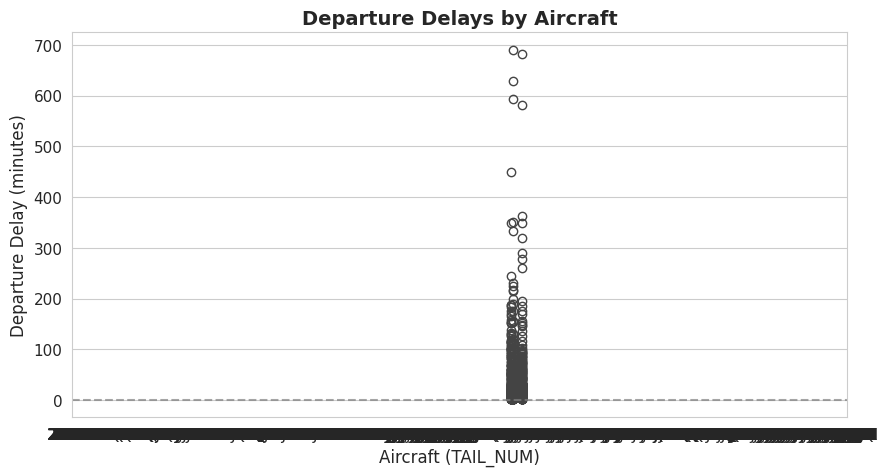

In [ ]:
# Departure Delays by Aircraft
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_selected, x='TAIL_NUM', y='DEP_DELAY', palette=colors)
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.7)
plt.title("Departure Delays by Aircraft", fontsize=14, fontweight="bold")
plt.xlabel("Aircraft (TAIL_NUM)", fontsize=12)
plt.ylabel("Departure Delay (minutes)", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

<ipython-input-58-39d3fb8c4eb8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_selected, x='TAIL_NUM', y='DISTANCE', palette=colors)
<ipython-input-58-39d3fb8c4eb8>:3: UserWarning: 
The palette list has fewer values (3) than needed (4759) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df_selected, x='TAIL_NUM', y='DISTANCE', palette=colors)


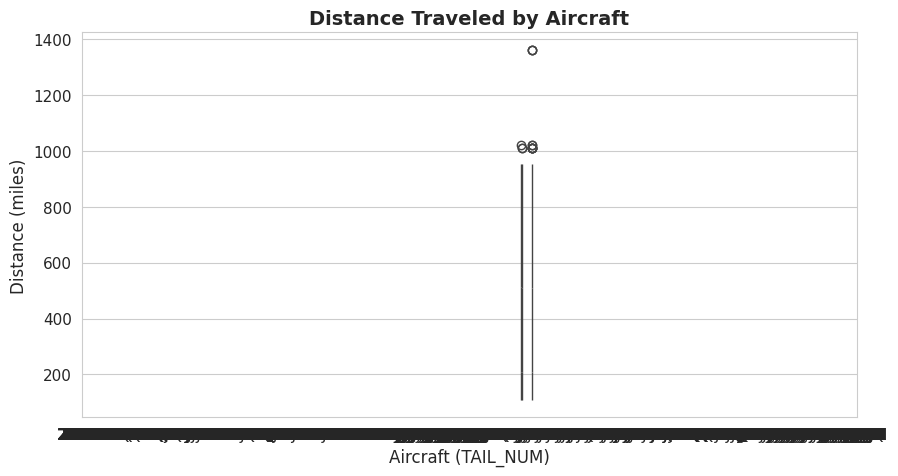

In [ ]:
# Distance Traveled by Aircraft
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_selected, x='TAIL_NUM', y='DISTANCE', palette=colors)
plt.title("Distance Traveled by Aircraft", fontsize=14, fontweight="bold")
plt.xlabel("Aircraft (TAIL_NUM)", fontsize=12)
plt.ylabel("Distance (miles)", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

<ipython-input-59-b3dadd15ecc5>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  carrier_delay = df_selected.groupby('CARRIER_CODE')['ARR_DELAY'].mean().sort_values()
<ipython-input-59-b3dadd15ecc5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=carrier_delay.index, y=carrier_delay.values, palette="viridis", edgecolor="black")


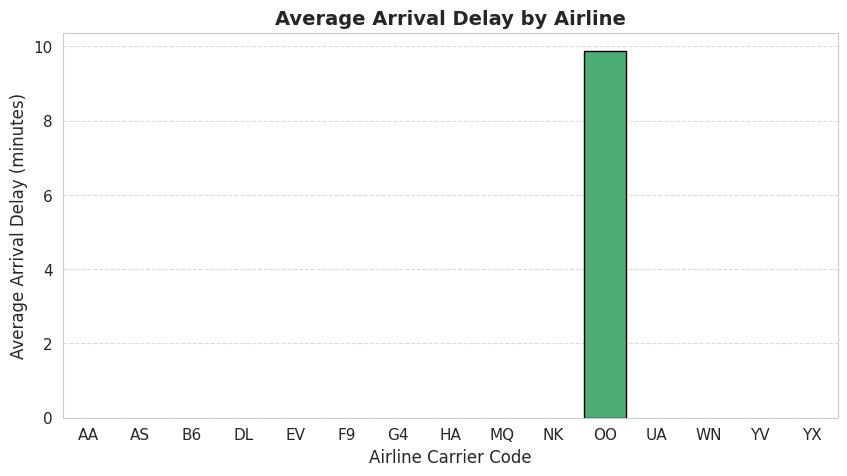

In [ ]:
# Arrival delay by Airline (CARRIER_CODE)
plt.figure(figsize=(10, 5))
carrier_delay = df_selected.groupby('CARRIER_CODE')['ARR_DELAY'].mean().sort_values()
sns.barplot(x=carrier_delay.index, y=carrier_delay.values, palette="viridis", edgecolor="black")
plt.title("Average Arrival Delay by Airline", fontsize=14, fontweight="bold")
plt.xlabel("Airline Carrier Code", fontsize=12)
plt.ylabel("Average Arrival Delay (minutes)", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Delay Analysis:** These aircraft show similar delay patterns, with most flights experiencing delays between 0-200 minutes. However, there are notable outliers reaching up to 700 minutes for both arrival and departure delays. The majority of delays cluster around the lower range, suggesting these aircraft generally maintain reasonable on-time performance. \

**Distance Patterns:** The distance data shows these aircraft primarily operate flights around 1000 miles, with some flights extending up to approximately 1400 miles. This consistent distance pattern suggests these aircraft are used for regional routes rather than long-haul flights, which aligns with SkyWest's business model as a regional carrier. \

**Overall Patterns:** The data reveals these SkyWest aircraft:
*   Operate primarily regional routes
*   Experience similar delay patterns
*   Have occasional significant delays (outliers)
*   Maintain relatively consistent flight distances
*   The similarity in patterns across all three aircraft suggests standardized operations within SkyWest's fleet management strategy.




**Question 7 — Summary**

Summarize the overall analysis and share THREE (3) key findings.

This practicum examines airline performance in terms of delays, operational efficiency, and regional patterns. Metrics such as departure and arrival delays, total flight hours, and regional mean delays were analyzed to identify the best and worst-performing airlines, regions, and aircraft. We used visualizations like bar charts, pie charts, and box plots to highlight trends and outliers. Three key findings were:


1.   Airlines such as Frontier (F9) and Republic Airways (YX) had the most severe average delays for both departures and arrivals. For example, F9 showed an average departure delay of approximately 20 minutes and a high standard deviation in delay, indicating inconsistent performance. These findings suggest that these airlines may struggle with operational inefficiencies, such as scheduling issues, ground service delays, or inadequate capacity management.
2.   Regions such as South Carolina (SC), Wyoming (WY), and New Jersey (NJ) exhibited the highest mean departure delays, with average delays exceeding 20 minutes. On the other hand, states like New Hampshire (NH) and Kansas (KS) consistently had the lowest average departure delays, often under 10 minutes.
3. Airlines such as EV and HA ranked as the best-performing carriers based on the lowest total delay (departure + arrival delay combined). Smaller airlines like EV, with fewer total flight hours, generally performed better compared to larger carriers like AS and B6, which managed significantly more flights. This could suggests that smaller airlines may have greater flexibility in their operations, allowing them to maintain punctuality. Larger airlines, despite managing more flights, may face scalability challenges that lead to delays.

